In [1]:
import pandas as pd
import numpy as np
import string # special operations on strings
# !pip install spacy
import spacy # language models
import nltk
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
# !pip install wordcloud
from wordcloud import WordCloud
%matplotlib inline

In [2]:
df = pd.read_csv('G:\Assignments\Text mining\Elon_musk.csv', encoding='latin1')
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df


,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
df.shape

(1999, 1)

In [5]:
pd.set_option("display.max_colwidth",None) # see full text
df.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!


In [6]:
import re
def clean_tweets(tweets):
    tweets = re.sub('@[A-Za-z0–9]+', '', tweets) #Removing tag(@)
    tweets = re.sub('#', '', tweets) # Removing hashtag(#)
    tweets = re.sub('RT[\s]+', '', tweets) # Removing Retweets
    tweets = re.sub('https?:\/\/\S+', '', tweets) # Removing links
    tweets = re.sub('<[^<]+?>', '', tweets) #remove html tags
    tweets = re.sub('\n', '', tweets) # remove new lines
    tweets = re.sub('&', '', tweets) #remove &amp
    return tweets
 
df.Text = df.Text.apply(clean_tweets)

In [7]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df.Text= df.Text.apply(lambda x: cleaning_punctuations(x))
df.tail()

,Text
1994,True it sounds so surreal but the negative propaganda is still all out there amp easy to find in social me
1995,Make sure to read ur terms amp conditions before clicking accept
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is
1998,Progress update August 28


In [8]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df.Text = df.Text.apply(lambda x: cleaning_numbers(x))
df.Text.tail()

1994     True it sounds so surreal but the negative propaganda is still all out there amp easy to find in social me
 
1995                                                 Make sure to read ur terms amp conditions before clicking accept
1996                                                                                                   Samwise Gamgee
1997                                                                                        Altho Dumb and Dumber is 
1998                                                                                          Progress update August 
Name: Text, dtype: object

In [9]:
pd.set_option("display.max_colwidth",-1) # see full text
df.sample(10)

C:\Users\Prayag\AppData\Local\Temp\ipykernel_13684\1980660173.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth",-1) # see full text


,Text
763,Tesla tops list of s Most Attractive Employers for US engineering students
236,Fallout New Texas
1185,Not bad
1113,All of that and more Were doing a broad review of launch site propulsion structures av
1083,It will soon
126,Life I sure hope thats not true at Tesla or SpaceX
809,Another fine day in the simulation
269,km every millisecond but there are times I wish it were faster
103,Giga Berlin progress
1286,Good analysis


In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [11]:
df['Text'] = df['Text'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (stop)]))
df.head()

,Text
0,Im alien
1,AACarmack Ray tracing Cyberpunk HDR nextlevel Have tried
2,Great interview
3,Doge underestimated
4,Congratulations Tesla China amazing execution last year Now next even


In [12]:
df = [x.strip() for x in df.Text] # remove both the leading and the trailing characters
df = [x for x in df if x] # removes empty strings, because they are considered in Python as False

In [22]:
from afinn import Afinn

In [23]:
afn = Afinn()

In [24]:
scores = [afn.score(Text) for Text in df]
sentiment = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in scores]

In [25]:
sent_df = pd.DataFrame()
sent_df['title'] =  df
sent_df['scores'] = scores
sent_df['sentiments'] = sentiment

In [26]:
sent_df

,title,scores,sentiments
0,Im alien,0.0,neutral
1,AACarmack Ray tracing Cyberpunk HDR nextlevel Have tried,0.0,neutral
2,Great interview,3.0,positive
3,Doge underestimated,-1.0,negative
4,Congratulations Tesla China amazing execution last year Now next even,6.0,positive
...,...,...,...
1874,True sounds surreal negative propaganda still amp easy find social,-1.0,negative
1875,Make sure read ur terms amp conditions clicking accept,1.0,positive
1876,Samwise Gamgee,0.0,neutral
1877,Altho Dumb Dumber,-3.0,negative


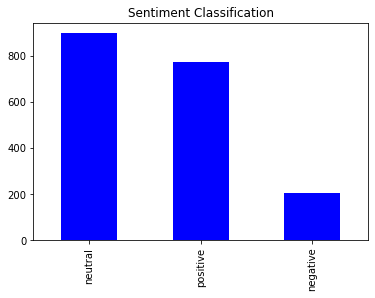

In [28]:
sent_df.sentiments.value_counts().plot(kind='bar', color='blue')
plt.title('Sentiment Classification')
plt.show()

In [29]:
sent_df['word_count'] = sent_df['title'].str.split().apply(len)
sent_df.head(10)

,title,scores,sentiments,word_count
0,Im alien,0.0,neutral,2
1,AACarmack Ray tracing Cyberpunk HDR nextlevel Have tried,0.0,neutral,8
2,Great interview,3.0,positive,2
3,Doge underestimated,-1.0,negative,2
4,Congratulations Tesla China amazing execution last year Now next even,6.0,positive,10
5,Happy New Year Ox,3.0,positive,4
6,Frodo underdogeAll thought would failHimself,0.0,neutral,5
7,Haha thanks,5.0,positive,2
8,Indeed Tweets definitely represent realworld time allocation,0.0,neutral,7
9,The entertaining outcome likely,2.0,positive,4


In [30]:
sent_df['scores'].describe()

count    1879.000000
mean     0.854710   
std      1.941001   
min     -8.000000   
25%      0.000000   
50%      0.000000   
75%      2.000000   
max      12.000000  
Name: scores, dtype: float64

C:\Users\Prayag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='scores', ylabel='Density'>

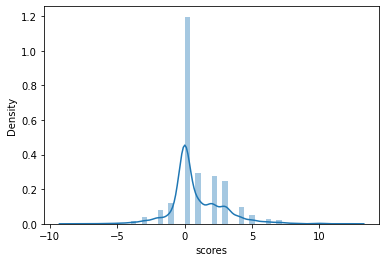

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['scores'])

In [32]:
sent_df['index']=range(0,len(sent_df))

<AxesSubplot:xlabel='index', ylabel='scores'>

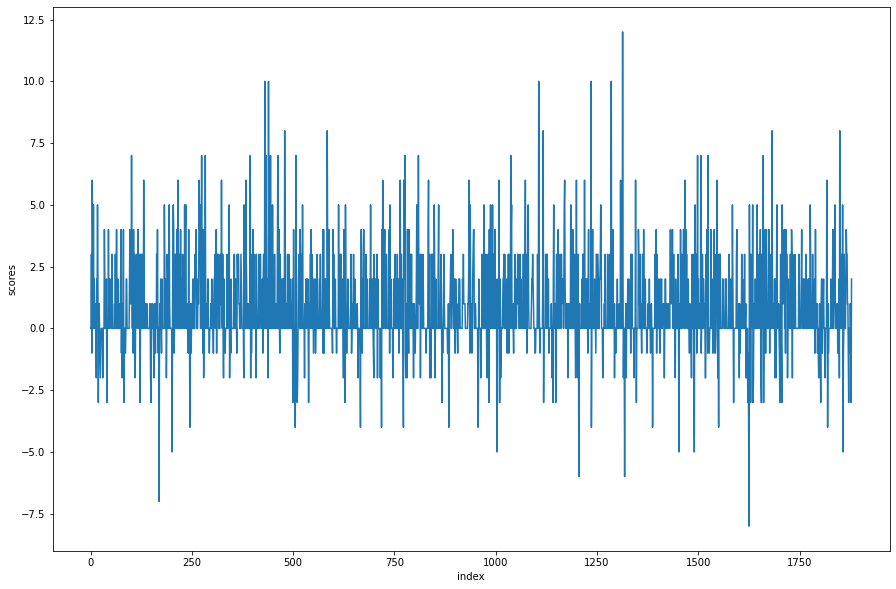

In [33]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='scores',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='scores'>

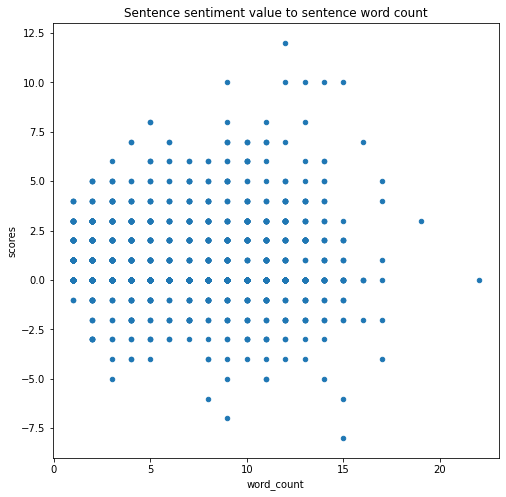

In [34]:
sent_df.plot.scatter(x='word_count', y='scores', figsize=(8,8), title='Sentence sentiment value to sentence word count')